In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("bank.csv")
print(df)

#2a
object_column = df.select_dtypes(include ="object").columns
print("object columns:\n",object_column)

#2b
print("\nUnique values in object columns:")
for column in object_column:
      print(f"\nColumn: {column}")
      print(df[column].unique())

#2c
print("\n Null values per column: ")
print(df.isnull().sum())

#3
df_numeric = df.drop(columns=object_column)
df_numeric.to_csv("banknumericdata.csv", index=False)
print("Saved as banknumericdata.csv")

#4
df_new = pd.read_csv("banknumericdata.csv")
print("\nSummary Statistics:")
print(df_new.describe())

Saving bank.csv to bank.csv
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day m

In [11]:
#1
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("medical_student.csv")
print(df.head())

#2
print("\nDataset info: ",df.info())
print("\nThe misssing value per column: ",df.isnull().sum())

#3
# For missing age value i used median because median is robust to outliers
# and preserves the central tendency and some student may have unusually high
# or low age, so media is better in this case.
df['Age'] = df['Age'].fillna(df['Age'].median())

# For missing GPA value, I used mean because GPA is usually normally distributed
# and filling missing values with mean maintains the overall average GPA
# without skewing the data.
df['Height'] = df['Height'].fillna(df['Height'].mean())

# For missing Department value, I used mode (most frequent category)
# because Department is categorical. Mode preserves the most common category
# and avoids introducing unknown values.
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
print("\n Missing values after imputation: ",df.isnull().sum())

#4
duplicate_values = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_values}")
df = df.drop_duplicates()

print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")
print("\nCleaned dataset preview:",df.head())

Saving medical_student.csv to medical_student (2).csv
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  
<class 'pandas.core.frame.DataFrame'>
R

In [13]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
df = pd.read_csv("titanic (1)")
df.columns = df.columns.str.strip()
print(df.head())

df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

subset= df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
print("\nSubset of dataset:\n", subset.head())

first_class= subset[subset['Pclass'] == 1]
print("\nFirst-class passengers:\n", first_class.head())

fare_mean = first_class['Fare'].mean()
fare_median = first_class['Fare'].median()
fare_max = first_class['Fare'].max()
fare_min = first_class['Fare'].min()

print("\nFare statistics for first-class passengers:")
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")

Saving titanic.csv to titanic.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3

In [14]:
null_age = first_class['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_age}")

first_class = first_class.dropna(subset=['Age'])
print(f"Number of null values in 'Age' after dropping: {first_class['Age'].isnull().sum()}")

Number of null values in 'Age': 30
Number of null values in 'Age' after dropping: 0


In [15]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
df = pd.read_csv("titanic.csv")
df.columns = df.columns.str.strip()
print(df.head())

# 1
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

#2
df = pd.concat([df, embarked_dummies], axis=1)

#3
df = df.drop('Embarked', axis=1)

#4
print("\nDataFrame after one-hot encoding 'Embarked':\n", df.head())


Saving titanic.csv to titanic (1).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

Mean survival rate by gender: Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


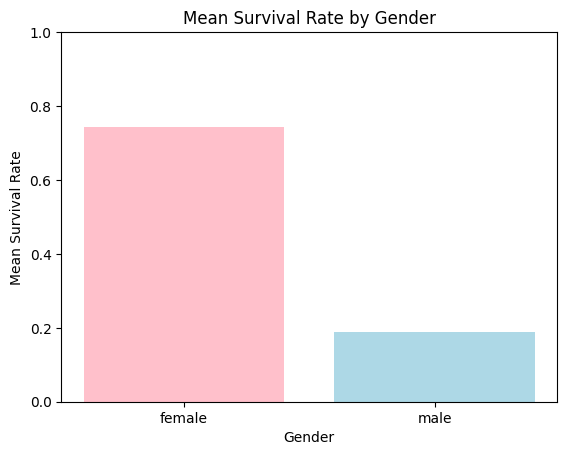

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean survival rate by gender:",mean_survival_by_sex)

plt.bar(mean_survival_by_sex.index, mean_survival_by_sex.values, color=['pink', 'lightblue'])
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Gender")
plt.ylim(0,1)
plt.show()

Mean survival rate by gender and embarkation port: Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603


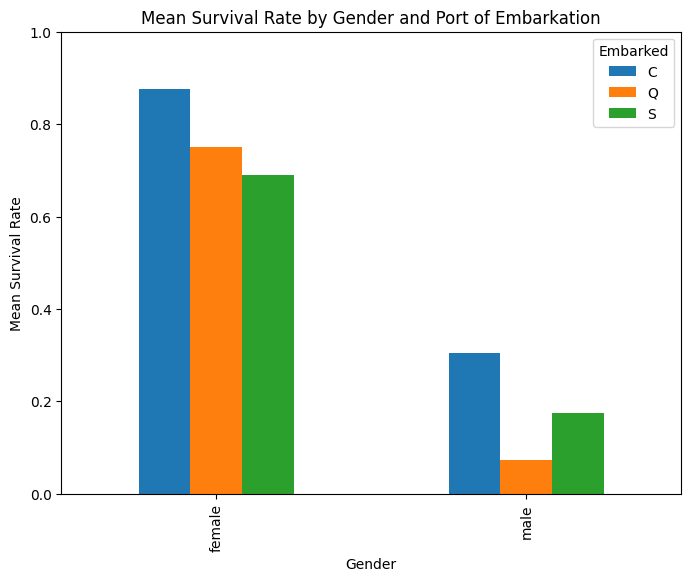

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

mean_survival = df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
mean_survival = mean_survival.fillna(0)
print("Mean survival rate by gender and embarkation port:",mean_survival)

mean_survival.plot(kind='bar', figsize=(8,6))
plt.title("Mean Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Gender")
plt.ylim(0,1)
plt.legend(title="Embarked")
plt.show()
